<a href="https://colab.research.google.com/github/gaudhami4/Image-Cartoonification/blob/main/Image_Cartoonification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install easygui

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92 kB 559 kB/s 


In [ ]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image


In [ ]:
def read_file(filename):
  img=cv2.imread(filename)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img
  

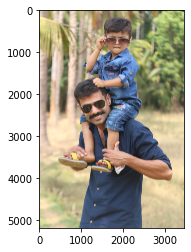

In [ ]:
filename="/content/IMG_2362.JPG"
img=read_file(filename)
org_img=np.copy(img)

In [ ]:
def edge_mask(img,line_size,blur_value):
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur=cv2.medianBlur(gray,blur_value)
  edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
  return edges


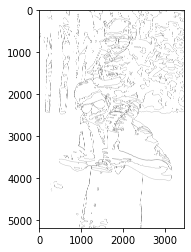

In [ ]:
line_size,blur_value=7,7
edges=edge_mask(img,line_size,blur_value)
plt.imshow(edges,cmap="gray")
plt.show()

In [ ]:
#reduce color palette
def color_quantization(img,k):
  #transform image
  data=np.float32(img).reshape((-1,3))
  criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
  #implementing kmeans
  ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center=np.uint8(center)
  result=center[label.flatten()]
  result=result.reshape(img.shape)
  return result

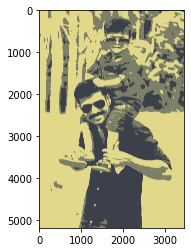

In [ ]:
img=color_quantization(img,k=3)
plt.imshow(img)
plt.show()

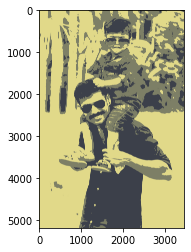

In [ ]:
#reduce the noise
blurred=cv2.bilateralFilter(img,d=7,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

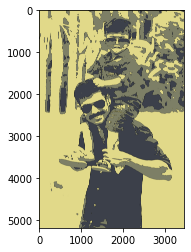

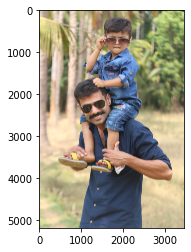

In [ ]:
#combine Edge mask with quantised image
def cartoon():
  c=cv2.bitwise_and(blurred,blurred,mask=edges)
  plt.imshow(c)
  plt.show()
  plt.imshow(org_img)
  plt.show()
cartoon()